In [1]:
#### Importing libraries
import warnings
import pandas as pd
import numpy as np

#### Ignore all warnings
warnings.filterwarnings('ignore')

In [2]:
#### loading train dataSet as pandas dataFrame
data=pd.read_excel('./Data/purchase.xlsx')

#### Let’s take a look at the top five rows of train dataset using the DataFrame’s head() method
data.head()

,Day,Discount,Free Delivery,Purchase
0,Weekday,Yes,Yes,Yes
1,Weekday,Yes,Yes,Yes
2,Weekday,No,No,No
3,Holiday,Yes,Yes,Yes
4,Weekend,Yes,Yes,Yes


In [3]:
#### Converting categorical to numeric
data.replace({'No':0, 'Yes':1}, inplace=True)
data = pd.get_dummies(columns = ['Day'], data = data)
data.head()

,Discount,Free Delivery,Purchase,Day_Holiday,Day_Weekday,Day_Weekend
0,1,1,1,0,1,0
1,1,1,1,0,1,0
2,0,0,0,0,1,0
3,1,1,1,1,0,0
4,1,1,1,0,0,1


In [4]:
#### Creating dependent and independent variables
# independent variables
x=data.drop(['Purchase'],axis=1)

# dependent variables
y=data['Purchase']

### BernoulliNB

In [5]:
#### BernoulliNB Model instantiate and fit
from sklearn.naive_bayes import BernoulliNB
model_bnb = BernoulliNB() 
model_bnb.fit(x, y)

BernoulliNB()

In [6]:
#### Defining function for Classification Results
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def classification_results(model, xR, yR, ON):
    #### Predicting train
    yR_predict = model.predict(xR)

    #### Calculating accuracy score for train
    acc = accuracy_score(yR, yR_predict)
    print('\033[1m' + ON + ':' +'\033[0m')
    print(f'Accuracy : {acc}')
    print('-'*55)

    #### Classification report for train
    CR = classification_report(yR, yR_predict)
    print("classification report : \n", CR)
    print('-'*55)

    #### Confusion matrix for train
    CM = confusion_matrix(yR, yR_predict)
    print("Confusion matrix :\n", CM)
    sns.heatmap(CM, center = True, annot = True, fmt = 'g')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    return(yR_predict, acc)

Results:
Accuracy : 0.9
-------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.92      0.96      0.94        24

    accuracy                           0.90        30
   macro avg       0.86      0.81      0.83        30
weighted avg       0.90      0.90      0.90        30

-------------------------------------------------------
Confusion matrix :
 [[ 4  2]
 [ 1 23]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

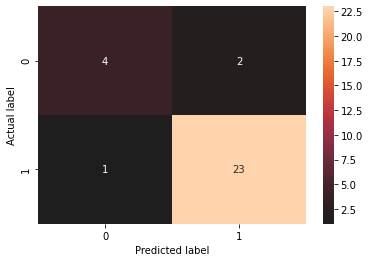

In [7]:
#### Classification Results
y_predict_bnb, acc_bnb = classification_results(model_bnb, x, y, 'Results')

In [8]:
#### defining function for ROC curve
import sklearn.metrics as metrics

def ROC_Curve(y, y_predict):
    X,Y = np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
    plt.plot(X, X, '--')

    #### Plot ROC
    fpr, tpr, thresholds = metrics.roc_curve(y, y_predict)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, marker='o', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return(roc_auc)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

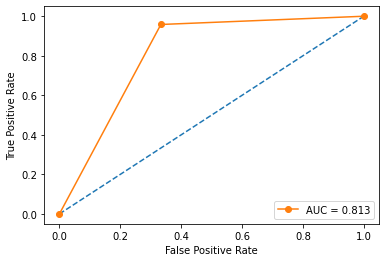

In [9]:
#### Plotting ROC Curve
roc_auc_bnb= ROC_Curve(y, y_predict_bnb)

In [10]:
final_results = []
dict_bnb = {'MODEL':'BernoulliNB',
            'ACCURACY' : acc_bnb,
            'AUC' : roc_auc_bnb,
          }
final_results.append(dict_bnb)

### GaussianNB

In [11]:
#### GaussianNB Model instantiate and fit
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB() 
model_gnb.fit(x, y)

GaussianNB()

Results:
Accuracy : 0.8
-------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      0.83      0.87        24

    accuracy                           0.80        30
   macro avg       0.70      0.75      0.72        30
weighted avg       0.83      0.80      0.81        30

-------------------------------------------------------
Confusion matrix :
 [[ 4  2]
 [ 4 20]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

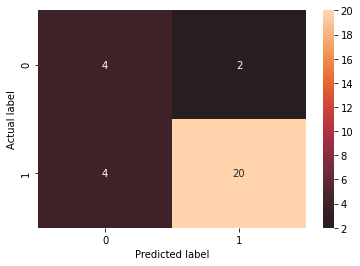

In [12]:
#### Classification Results on train
y_predict_gnb, acc_gnb = classification_results(model_gnb,  x, y, 'Results')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

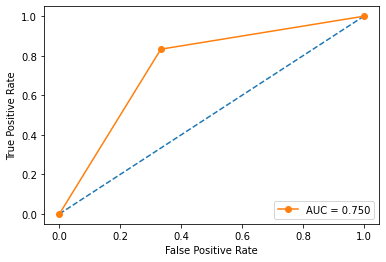

In [13]:
#### Plotting ROC Curve
roc_auc_gnb= ROC_Curve(y, y_predict_gnb)

In [14]:
dict_gnb = {'MODEL':'GaussianNB',
            'ACCURACY' : acc_gnb,
            'AUC' : roc_auc_gnb,
          }
final_results.append(dict_gnb)

### MultinomialNB

In [15]:
#### MultinomialNB Model instantiate and fit
from sklearn.naive_bayes import MultinomialNB
model_mnb = MultinomialNB() 
model_mnb.fit(x, y)

MultinomialNB()

Result:
Accuracy : 0.8
-------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.80      1.00      0.89        24

    accuracy                           0.80        30
   macro avg       0.40      0.50      0.44        30
weighted avg       0.64      0.80      0.71        30

-------------------------------------------------------
Confusion matrix :
 [[ 0  6]
 [ 0 24]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

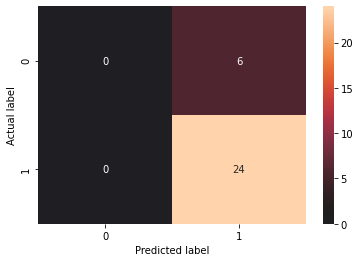

In [16]:
#### Classification Results 
y_predict_mnb, acc_mnb = classification_results(model_mnb, x, y, 'Result')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

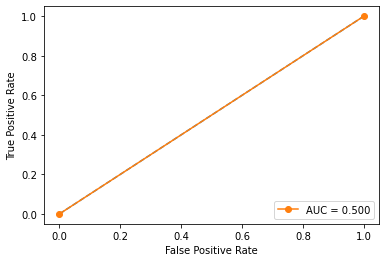

In [17]:
#### Plotting ROC Curve
roc_auc_mnb= ROC_Curve(y, y_predict_mnb)

In [18]:
dict_mnb = {'MODEL' : 'MultinomialNB',
           'ACCURACY' : acc_mnb,
           'AUC' : roc_auc_mnb
          }
final_results.append(dict_mnb)

In [19]:
df_results = pd.DataFrame(final_results)
(df_results.sort_values(by=['ACCURACY','AUC'],ascending=False)
    .reset_index(drop=True)
    .style.background_gradient(cmap='Greens'))

,MODEL,ACCURACY,AUC
0,BernoulliNB,0.900000,0.812500
1,GaussianNB,0.800000,0.750000
2,MultinomialNB,0.800000,0.500000
